## 1. Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("flight_price.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
# some basic EDA

In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

## most of the columns of the data are of object data type, lets convert them to numeric datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# dropping the null values
df.dropna(axis = 0, inplace = True)

In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
# changing the datatype to date-time format
df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [11]:
df["day"] = df["Date_of_Journey"].str.split('/').str[0]
df["month"] = df["Date_of_Journey"].str.split('/').str[1]
df["year"] = df["Date_of_Journey"].str.split('/').str[2]

In [12]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [13]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                object
month              object
year               object
dtype: object

In [14]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

In [15]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
day                 int32
month               int32
year                int32
dtype: object

In [16]:
## we can also use these columns to make out, if the day was a weekday or a weekend, >> this would be helpful for predicting that are there more on 
# > weekdays or weekends
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [17]:
df['date'].dt.dayofweek # here 0 represents monday and 6 represents sunday 

0        6
1        2
2        6
3        6
4        4
        ..
10678    1
10679    5
10680    5
10681    4
10682    3
Name: date, Length: 10682, dtype: int32

In [18]:
# lets create 2 more columns as 'is_weekend' and 'is_weekday'
df['is_weekend'] = df['date'].dt.dayofweek >= 5

In [19]:
df['is_weekend'] = df['is_weekend'].astype(int) # 1 represents "saturday" , "sunday" and 0 represents rest days of the week

In [20]:
## we can now drop the "date of journey " cloumn

df.drop("Date_of_Journey", axis= 1, inplace= True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,date,is_weekend
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2019-03-24,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,2019-05-01,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,2019-06-09,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,2019-05-12,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,2019-03-01,0


In [22]:
# ## also lets catagorise months to season 

# def get_season(month):
#     if month in [12, 1, 2]:
#         return 'Winter'
#     elif month in [3, 4, 5]:
#         return 'Spring'
#     elif month in [6, 7, 8]:
#         return 'Summer'
#     else:
#         return 'Fall'

# df['season'] = df['month'].apply(get_season)

# # lets catagorize seasons into variable
# #df['season'] = pd.Categorical(df['season'], categories=['Winter', 'Spring', 'Summer', 'Fall'])
# # >> use the above code while modeling 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Source           10682 non-null  object        
 2   Destination      10682 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10682 non-null  object        
 5   Arrival_Time     10682 non-null  object        
 6   Duration         10682 non-null  object        
 7   Total_Stops      10682 non-null  object        
 8   Additional_Info  10682 non-null  object        
 9   Price            10682 non-null  int64         
 10  day              10682 non-null  int32         
 11  month            10682 non-null  int32         
 12  year             10682 non-null  int32         
 13  date             10682 non-null  datetime64[ns]
 14  is_weekend       10682 non-null  int32     

In [24]:
# lets analyse the Arrival_time column
df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [25]:
df.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [26]:
# cleaning the column
df['Arrival_Time'].apply(lambda x:x.split(' '))
#You want only the time, that is 0th element

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10682, dtype: object

In [27]:
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [28]:
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [29]:
df['Arrival_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_mins'] = df['Arrival_Time'].str.split(':').str[1]

In [30]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,date,is_weekend,Arrival_hour,Arrival_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,2019-03-24,1,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,2019-05-01,0,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,2019-06-09,1,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,2019-05-12,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,2019-03-01,0,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,2019-04-09,0,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,2019-04-27,1,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,2019-04-27,1,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,2019-03-01,0,14,10


In [31]:
df['Arrival_hour'] = df['Arrival_hour'].astype(int)
df['Arrival_mins'] = df['Arrival_mins'].astype(int)

In [32]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
day                         int32
month                       int32
year                        int32
date               datetime64[ns]
is_weekend                  int32
Arrival_hour                int32
Arrival_mins                int32
dtype: object

In [33]:
# again the previous cloumn does not make sense
df.drop('Arrival_Time', axis = 1, inplace = True)

In [34]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
day                         int32
month                       int32
year                        int32
date               datetime64[ns]
is_weekend                  int32
Arrival_hour                int32
Arrival_mins                int32
dtype: object

In [35]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'day', 'month', 'year',
       'date', 'is_weekend', 'Arrival_hour', 'Arrival_mins'],
      dtype='object')

In [36]:
df.Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [37]:
df['Dept_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_mins'] = df['Dep_Time'].str.split(':').str[1]

In [38]:
df['Dept_hour'] = df['Dept_hour'].astype(int)
df['Dept_mins'] = df['Dept_mins'].astype(int)

In [39]:
df.drop('Dep_Time', axis = 1, inplace = True)

In [40]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'day', 'month', 'year', 'date',
       'is_weekend', 'Arrival_hour', 'Arrival_mins', 'Dept_hour', 'Dept_mins'],
      dtype='object')

In [41]:
df.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
day                         int32
month                       int32
year                        int32
date               datetime64[ns]
is_weekend                  int32
Arrival_hour                int32
Arrival_mins                int32
Dept_hour                   int32
Dept_mins                   int32
dtype: object

In [42]:
df.Total_Stops
# the column is catagorical data lets map it to numeric datatype

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [43]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [44]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4})
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Source           10682 non-null  object        
 2   Destination      10682 non-null  object        
 3   Route            10682 non-null  object        
 4   Duration         10682 non-null  object        
 5   Total_Stops      10682 non-null  int64         
 6   Additional_Info  10682 non-null  object        
 7   Price            10682 non-null  int64         
 8   day              10682 non-null  int32         
 9   month            10682 non-null  int32         
 10  year             10682 non-null  int32         
 11  date             10682 non-null  datetime64[ns]
 12  is_weekend       10682 non-null  int32         
 13  Arrival_hour     10682 non-null  int32         
 14  Arrival_mins     10682 non-null  int32     

In [46]:
#the feature "Route" can be used in two ways
# >> To know source of the flight and the destination >> which can already be defined in the data
#as number of stops and total stops is already there
#So the feature "Route" is a repeatative information

In [47]:
df.drop('Route', axis = 1, inplace = True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Source           10682 non-null  object        
 2   Destination      10682 non-null  object        
 3   Duration         10682 non-null  object        
 4   Total_Stops      10682 non-null  int64         
 5   Additional_Info  10682 non-null  object        
 6   Price            10682 non-null  int64         
 7   day              10682 non-null  int32         
 8   month            10682 non-null  int32         
 9   year             10682 non-null  int32         
 10  date             10682 non-null  datetime64[ns]
 11  is_weekend       10682 non-null  int32         
 12  Arrival_hour     10682 non-null  int32         
 13  Arrival_mins     10682 non-null  int32         
 14  Dept_hour        10682 non-null  int32     

In [49]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [50]:
df['duration_hours'] = df['Duration'].str.extract(r'(\d+)h')
df['duration_hours'] = df['duration_hours'].fillna(0).astype(int)

df['duration_minutes'] = df['Duration'].str.extract(r'(\d+)m')
df['duration_minutes'] = df['duration_minutes'].fillna(0).astype(int)


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  object        
 1   Source            10682 non-null  object        
 2   Destination       10682 non-null  object        
 3   Duration          10682 non-null  object        
 4   Total_Stops       10682 non-null  int64         
 5   Additional_Info   10682 non-null  object        
 6   Price             10682 non-null  int64         
 7   day               10682 non-null  int32         
 8   month             10682 non-null  int32         
 9   year              10682 non-null  int32         
 10  date              10682 non-null  datetime64[ns]
 11  is_weekend        10682 non-null  int32         
 12  Arrival_hour      10682 non-null  int32         
 13  Arrival_mins      10682 non-null  int32         
 14  Dept_hour         10682 non

In [52]:
df.drop('Duration', axis = 1, inplace = True)

In [53]:
df.dtypes

Airline                     object
Source                      object
Destination                 object
Total_Stops                  int64
Additional_Info             object
Price                        int64
day                          int32
month                        int32
year                         int32
date                datetime64[ns]
is_weekend                   int32
Arrival_hour                 int32
Arrival_mins                 int32
Dept_hour                    int32
Dept_mins                    int32
duration_hours               int32
duration_minutes             int32
dtype: object

In [54]:
df.Additional_Info.unique()# most of valuse here shows no info lets not use this column for no,  prefer dropping it , (not very useful)

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [55]:
#internal homework
#Univariate analysis
#Bivariate analysis
#multivariate analysis
#considering price as target variable separate X and y
#train test split
#scaling

## univariate analysis

In [56]:
def plot_histograms(df, bins=10, figsize=(15, 10), color='skyblue', kde = True):
    df.hist(bins=bins, figsize=figsize, color=color, edgecolor='black')
    plt.tight_layout()
    plt.show()

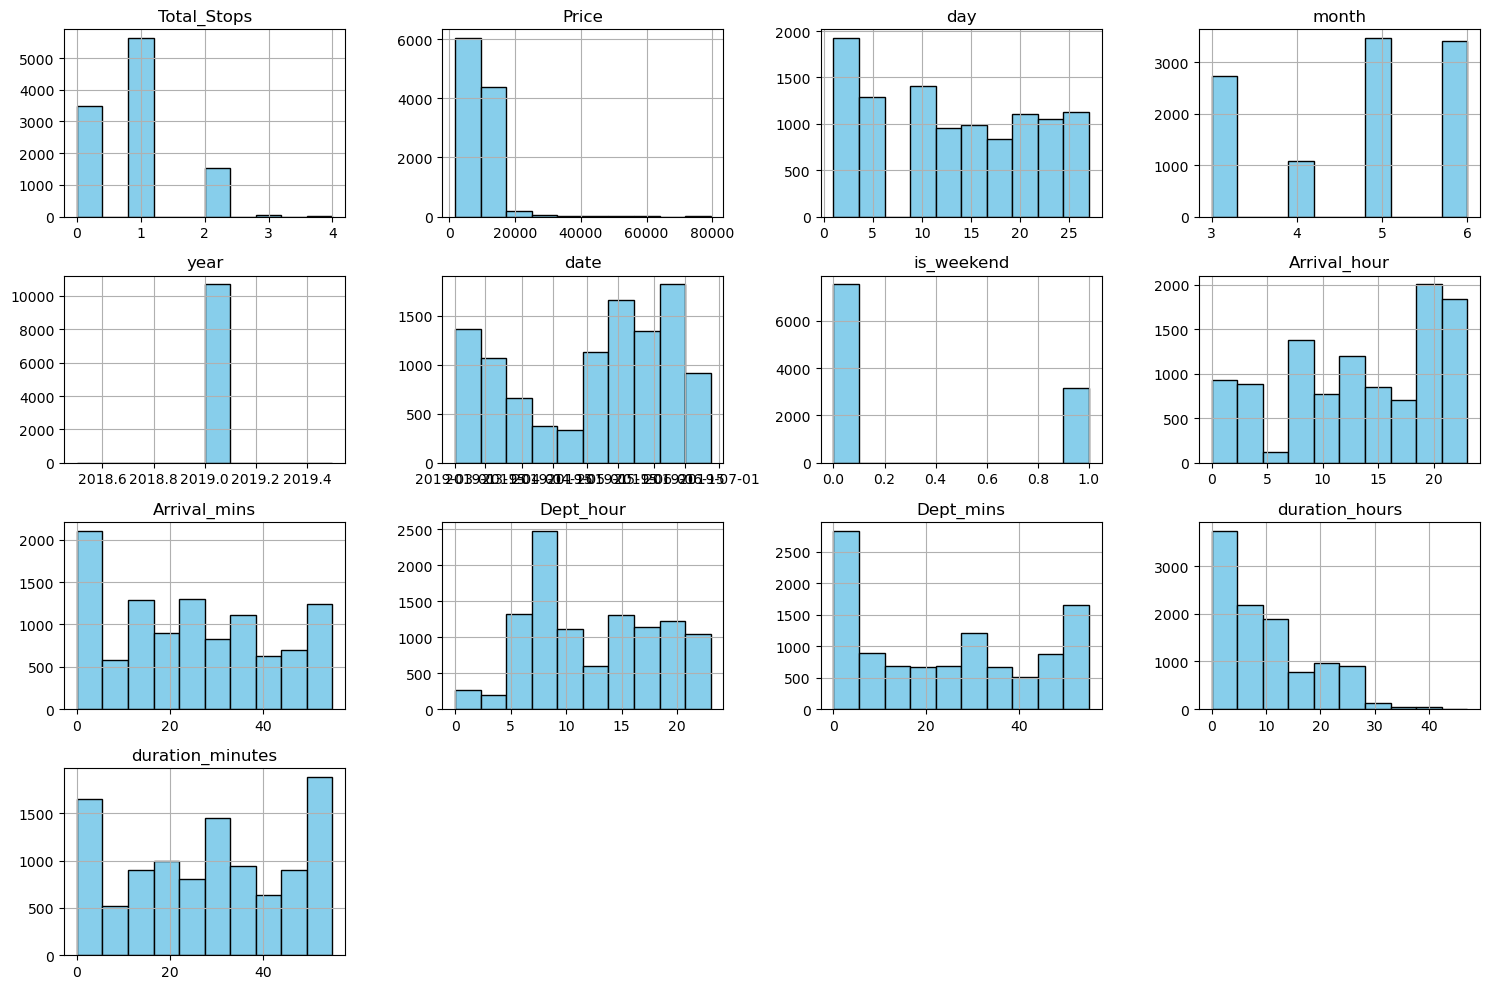

In [57]:
plot_histograms(df)

In [59]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,day,month,year,date,is_weekend,Arrival_hour,Arrival_mins,Dept_hour,Dept_mins,duration_hours,duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,2019-03-24,1,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,2019-05-01,0,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,2019-06-09,1,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,2019-05-12,1,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,2019-03-01,0,21,35,16,50,4,45
